In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/FDM Data Set - Telecommunication/Hotel Reservations.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/FDM Project Files')
!pwd

/content/drive/MyDrive/Colab Notebooks/FDM Project Files


In [51]:
# Show data
print(data.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [52]:
# Descriptive statistics on dataset numerical columns
data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
      'no_of_week_nights', 'required_car_parking_space', 'lead_time',
      'arrival_year', 'arrival_month', 'arrival_date',
      'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
      'avg_price_per_room', 'no_of_special_requests']].describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [53]:
# Encode categorical variables
label_encoders = {}
for column in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [54]:
# Selecting features for clustering
clustering_data = data[['avg_price_per_room', 'lead_time', 'no_of_special_requests',
                        'no_of_previous_bookings_not_canceled', 'repeated_guest',
                        'market_segment_type']]

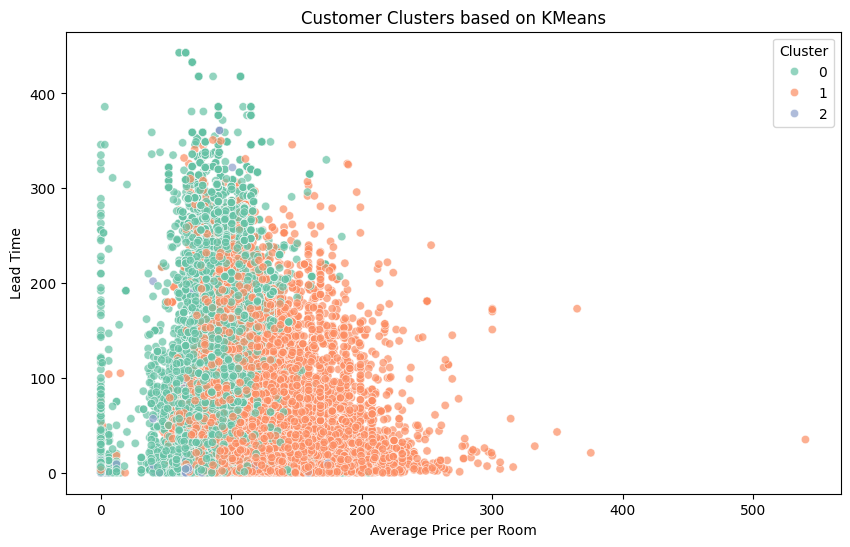

Cluster Centers (scaled):
[[-0.45393575  0.32746069 -0.61488605 -0.08745646 -0.16220995 -0.51362825]
 [ 0.50776542 -0.28150111  0.61499739 -0.08745646 -0.16220995  0.61977401]
 [-1.07823213 -0.83832382 -0.07286695  3.32381555  6.16485007 -2.08225582]]
Cluster Centers (original scale):
[[ 8.74954146e+01  1.13371133e+02  1.36216584e-01 -2.57571742e-14
  -1.01169073e-14  3.20239514e+00]
 [ 1.21240490e+02  6.10432698e+01  1.10318177e+00 -2.65065747e-14
  -1.02695630e-14  3.97483922e+00]
 [ 6.55895161e+01  1.31956989e+01  5.62365591e-01  5.98387097e+00
   1.00000000e+00  2.13333333e+00]]


In [55]:
# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='avg_price_per_room', y='lead_time', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Customer Clusters based on KMeans')
plt.xlabel('Average Price per Room')
plt.ylabel('Lead Time')
plt.legend(title='Cluster')
plt.show()

# Check cluster centers (to understand each cluster's characteristics)
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

# Inverse transform the cluster centers to the original scale
print("Cluster Centers (original scale):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

In [56]:
# Inverse transform the cluster centers to the original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):")
print(original_centers)

# Analyze the clusters and assign labels
cluster_summary = pd.DataFrame(original_centers, columns=['avg_price_per_room', 'lead_time',
                                                            'no_of_special_requests',
                                                            'no_of_previous_bookings_not_canceled',
                                                            'repeated_guest', 'market_segment_type'])
cluster_summary['Cluster_Label'] = ''

# Define thresholds for labeling
threshold_luxury = data['avg_price_per_room'].quantile(0.75)  # Top 25% for luxury
threshold_frequent = data['repeated_guest'].median()           # Median for frequent

# Assign labels based on the defined thresholds
for index, row in cluster_summary.iterrows():
    if row['avg_price_per_room'] >= threshold_luxury:
        cluster_summary.at[index, 'Cluster_Label'] = 'Luxury'
    elif row['repeated_guest'] >= threshold_frequent:
        cluster_summary.at[index, 'Cluster_Label'] = 'Frequent'
    else:
        cluster_summary.at[index, 'Cluster_Label'] = 'Budget'

# Display the summary of clusters
print(cluster_summary[['avg_price_per_room', 'lead_time', 'no_of_special_requests', 'Cluster_Label']])

Cluster Centers (original scale):
[[ 8.74954146e+01  1.13371133e+02  1.36216584e-01 -2.57571742e-14
  -1.01169073e-14  3.20239514e+00]
 [ 1.21240490e+02  6.10432698e+01  1.10318177e+00 -2.65065747e-14
  -1.02695630e-14  3.97483922e+00]
 [ 6.55895161e+01  1.31956989e+01  5.62365591e-01  5.98387097e+00
   1.00000000e+00  2.13333333e+00]]
   avg_price_per_room   lead_time  no_of_special_requests Cluster_Label
0           87.495415  113.371133                0.136217        Budget
1          121.240490   61.043270                1.103182        Luxury
2           65.589516   13.195699                0.562366      Frequent


In [57]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_data_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(clustering_data_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin:.4f}')

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(clustering_data_scaled, data['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz:.4f}')


Silhouette Score: 0.2659
Davies-Bouldin Index: 1.2400
Calinski-Harabasz Index: 12525.4603


In [58]:
import joblib

# Save the model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [59]:
!pip install streamlit

In [60]:
%%writefile appcluster.py

import streamlit as st
import numpy as np
import joblib

# Load the trained KMeans model and scaler
kmeans_model = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define input fields for customer details
st.title("Customer Cluster Prediction")

# Input fields
avg_price_per_room = st.number_input('Average Price per Room', min_value=0.0, value=100.0, step=0.1)
lead_time = st.number_input('Lead Time (days)', min_value=0, value=50)
no_of_special_requests = st.number_input('Number of Special Requests', min_value=0, value=1)
no_of_previous_bookings_not_canceled = st.number_input('Previous Bookings Not Canceled', min_value=0, value=0)
repeated_guest = st.selectbox('Is Repeated Guest?', [0, 1])
market_segment_type = st.selectbox('Market Segment Type', [0, 1, 2, 3])  # Assuming encoded market segments

# Collect the input data into a numpy array
customer_data = np.array([[avg_price_per_room, lead_time, no_of_special_requests,
                           no_of_previous_bookings_not_canceled, repeated_guest, market_segment_type]])

# Button to predict the cluster
if st.button('Predict Cluster'):
    # Scale the input data
    customer_data_scaled = scaler.transform(customer_data)

    # Predict the cluster
    cluster = kmeans_model.predict(customer_data_scaled)[0]

    # Assign cluster labels
    if cluster == 0:
        cluster_label = 'Budget'
    elif cluster == 1:
        cluster_label = 'Luxury'
    else:
        cluster_label = 'Frequent'

    # Display the predicted cluster
    st.write(f'The predicted customer cluster is: **{cluster_label}**')


Writing appcluster.py
